In [ ]:
!pip install wordcloud
!pip install KoNLPy

In [24]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
from konlpy.tag import Okt
from collections import Counter

In [27]:
csv_file = '테슬라_20230319~20240319_300page.csv'
df = pd.read_csv(f'../data/{csv_file}')
df

,뉴스 제목
0,"테슬라, 북미·유럽서 주력 모델 가격 인상에 주가 6% 상승"
1,"결국 손 바뀐 제주맥주... ‘테슬라 상장’ 피해, 투자자 독박"
2,테슬라 이어 GM도...46파이 배터리 경쟁 본격화
3,[속보]기술주 힘에 뉴욕증시 상승…테슬라 6.25%↑
4,"머스크, '마약설'에 ""케타민 복용 도움""…테슬라 주가는 6%↑"
...,...
4495,"“IRA, 현실 반영 안돼” 테슬라·GM도 호소"
4496,"테슬라, 중국에서 162만대 리콜...원격 업데이트 예정"
4497,"테슬라 모델 Y, 2023년 호주 베스트셀링 전기차 등극"
4498,"BYD, ‘2023년 4분기’ 판매량 테슬라 추월…적극적인 시장 확대 가속화"


In [14]:
# C열 (뉴스 제목)의 데이터를 리스트로 가져오기
c_list = df['뉴스 제목'].tolist()
print(f'c_list: {c_list}')

c_list: [' 테슬라, 북미·유럽서 주력 모델 가격 인상에 주가 6% 상승 ', ' 결국 손 바뀐 제주맥주... ‘테슬라 상장’ 피해, 투자자 독박 ', ' 테슬라 이어 GM도...46파이 배터리 경쟁 본격화 ', ' [속보]기술주 힘에 뉴욕증시 상승…테슬라 6.25%↑ ', ' 머스크, \'마약설\'에 "케타민 복용 도움"…테슬라 주가는 6%↑ ', " 테슬라, 북미·유럽서 '모델Y' 가격 인상 ", " 수제맥주 '상장 1호' 제주맥주, 경영권 매각한다 ", ' “테슬라부터 에르메스까지”···1등 기업만 모은 ETF 등장 ', ' 모델Y 인상 추진 … 테슬라,모처럼 웃었다 ', ' 콧대 높던 애플 어쩌다가…"아이폰 파격 할인" 특단의 조치 ', " 현대차 아이오닉5·기아 EV6, 작년 美서 잘 팔린 전기차 '톱10' ", ' 테슬라 6.25%-리비안 3.26%, 니콜라 제외 일제↑(종합) ', ' [트렌딩 핫스톡] 테슬라, 美 이어 유럽서 모델Y 가격 인상에 주가 강세 ', ' "아직도 테슬라 매수 중?"…요즘 서학개미들 몰려든 곳 ', ' 테슬라, 인종차별 소송 낸 흑인과 합의 ', ' 테슬라에 장착 가능한 K-원통형 배터리 8월부터 양산 ', ' 테슬라·비야디 잡아라… 경쟁사와 손잡는 완성차 업계 ', ' \'돈나무 언니\' 캐시 우드, 테슬라 주식 대량 매수…"쌀 때 사자" ', ' 테슬라 낙관론자 댄 아이브스 "테슬라, 장기적 전망 밝아" ', ' 테슬라, 4월부터 모델Y 판매가 인상으로 주가 기지개 ', " 뉴욕증시, '찜찜한' FOMC 앞둔 '불안한' 반등····알파벳 4.6%↑·테슬라 6.3%↑ ", ' 머스크 "케타민 처방, 테슬라 투자자들에게 \'최선의 이익\'" ', ' “이래도 안 사요?” 中 3분의1값 전기차 출시 선언 ', " 테슬라에도 볕들 날?…캐시우드 매수 등 '호재' [글로벌 뉴스픽] ", ' 커버드콜의 배신 … 고배당 좇다가 수익 뚝 ', ' 테슬라 승리?…전기차 관세 조건부 인하 ', ' 전기자동차 내연기관차 값 202

In [15]:
# 리스트를 하나의 벡터 자료로 합치기
vector = ' '.join(c_list)
print(f'vector: {vector}')

vector:  테슬라, 북미·유럽서 주력 모델 가격 인상에 주가 6% 상승   결국 손 바뀐 제주맥주... ‘테슬라 상장’ 피해, 투자자 독박   테슬라 이어 GM도...46파이 배터리 경쟁 본격화   [속보]기술주 힘에 뉴욕증시 상승…테슬라 6.25%↑   머스크, '마약설'에 "케타민 복용 도움"…테슬라 주가는 6%↑   테슬라, 북미·유럽서 '모델Y' 가격 인상   수제맥주 '상장 1호' 제주맥주, 경영권 매각한다   “테슬라부터 에르메스까지”···1등 기업만 모은 ETF 등장   모델Y 인상 추진 … 테슬라,모처럼 웃었다   콧대 높던 애플 어쩌다가…"아이폰 파격 할인" 특단의 조치   현대차 아이오닉5·기아 EV6, 작년 美서 잘 팔린 전기차 '톱10'   테슬라 6.25%-리비안 3.26%, 니콜라 제외 일제↑(종합)   [트렌딩 핫스톡] 테슬라, 美 이어 유럽서 모델Y 가격 인상에 주가 강세   "아직도 테슬라 매수 중?"…요즘 서학개미들 몰려든 곳   테슬라, 인종차별 소송 낸 흑인과 합의   테슬라에 장착 가능한 K-원통형 배터리 8월부터 양산   테슬라·비야디 잡아라… 경쟁사와 손잡는 완성차 업계   '돈나무 언니' 캐시 우드, 테슬라 주식 대량 매수…"쌀 때 사자"   테슬라 낙관론자 댄 아이브스 "테슬라, 장기적 전망 밝아"   테슬라, 4월부터 모델Y 판매가 인상으로 주가 기지개   뉴욕증시, '찜찜한' FOMC 앞둔 '불안한' 반등····알파벳 4.6%↑·테슬라 6.3%↑   머스크 "케타민 처방, 테슬라 투자자들에게 '최선의 이익'"   “이래도 안 사요?” 中 3분의1값 전기차 출시 선언   테슬라에도 볕들 날?…캐시우드 매수 등 '호재' [글로벌 뉴스픽]   커버드콜의 배신 … 고배당 좇다가 수익 뚝   테슬라 승리?…전기차 관세 조건부 인하   전기자동차 내연기관차 값 2027년이면 같은 수준   [오늘의 뉴욕증시 무버] 알파벳, 제미나이 아이폰 탑재 논의에 4.6%↑…테슬라도 급등   잘 나가던 테슬라, 올해 '제로(0)' 

In [16]:
# 형태소 분석
okt = Okt()
nouns = okt.nouns(vector)
print(f'nouns(형태소 분석 후): {nouns}')

nouns(형태소 분석 후): ['테슬라', '북미', '유럽', '주력', '모델', '가격', '인상', '주가', '상승', '손', '제주', '맥주', '테슬라', '상장', '피해', '투자자', '독박', '테슬라', '도', '파이', '배터리', '경쟁', '본격', '속보', '기술', '주', '힘', '뉴욕증시', '상승', '테슬라', '머스크', '마약', '설', '케타민', '복용', '도움', '테슬라', '주가', '테슬라', '북미', '유럽', '모델', '가격', '인상', '수제', '맥주', '상장', '호', '제주', '맥주', '경영', '매각', '테슬라', '에르메스', '기업', '등장', '모델', '인상', '추진', '테슬라', '모처럼', '콧대', '애플', '어쩌다가', '아이폰', '파격', '할인', '특단', '조치', '현대차', '아이오', '닉', '기아', '작년', '전기차', '톱', '테슬라', '리', '니콜라', '제외', '일제', '종합', '트렌딩', '핫', '스톡', '테슬라', '유럽', '모델', '가격', '인상', '주가', '강세', '테슬라', '매수', '중', '요즘', '서학', '개미', '곳', '테슬라', '인종차별', '소송', '흑인', '합의', '테슬라', '장착', '원통', '배터리', '양산', '테슬라', '경쟁', '완성', '차', '업계', '돈나무', '언니', '캐시', '우드', '테슬라', '주식', '대량', '매수', '쌀', '때', '사자', '테슬라', '낙관', '론', '아이브', '스', '테슬라', '장기', '전망', '테슬라', '모델', '판매', '인상', '주가', '기지개', '뉴욕증시', '반등', '알파벳', '테슬라', '머스크', '케타민', '처방', '테슬라', '투자자', '최선', '이익', '안', '사', '값', '전기차', '출시', '선언', '테슬라', '볕', '날',

In [17]:
# 길이가 1인 단어들을 정규 표현식으로 제거
shortword = re.compile(r'\W\b\w{1}\b')
# 리스트 내의 모든 nouns를 하나의 문자열로 합치기
nouns_str = ' '.join(nouns)
print(f'nouns_str: {nouns_str}')
# 정규표현식을 이용하여 길아가 1인 단어들을 제거
filtered_nouns_str = shortword.sub('', nouns_str)
print(f'filtered_nouns_str: {filtered_nouns_str}')

nouns_str: 테슬라 북미 유럽 주력 모델 가격 인상 주가 상승 손 제주 맥주 테슬라 상장 피해 투자자 독박 테슬라 도 파이 배터리 경쟁 본격 속보 기술 주 힘 뉴욕증시 상승 테슬라 머스크 마약 설 케타민 복용 도움 테슬라 주가 테슬라 북미 유럽 모델 가격 인상 수제 맥주 상장 호 제주 맥주 경영 매각 테슬라 에르메스 기업 등장 모델 인상 추진 테슬라 모처럼 콧대 애플 어쩌다가 아이폰 파격 할인 특단 조치 현대차 아이오 닉 기아 작년 전기차 톱 테슬라 리 니콜라 제외 일제 종합 트렌딩 핫 스톡 테슬라 유럽 모델 가격 인상 주가 강세 테슬라 매수 중 요즘 서학 개미 곳 테슬라 인종차별 소송 흑인 합의 테슬라 장착 원통 배터리 양산 테슬라 경쟁 완성 차 업계 돈나무 언니 캐시 우드 테슬라 주식 대량 매수 쌀 때 사자 테슬라 낙관 론 아이브 스 테슬라 장기 전망 테슬라 모델 판매 인상 주가 기지개 뉴욕증시 반등 알파벳 테슬라 머스크 케타민 처방 테슬라 투자자 최선 이익 안 사 값 전기차 출시 선언 테슬라 볕 날 캐시 우드 매수 등 호재 글로벌 뉴스 픽 버드 콜 배신 배당 좇다 수익 뚝 테슬라 승리 전기차 관세 조건 부 인하 전기자동차 내연기관차 값 수준 오늘 뉴욕증시 무버 알파벳 미나 아이폰 탑재 논의 테슬라 급등 테슬라 올해 제로 성장 내년 마이너스 서학 개미 최애 주식 이제 테슬라 김대호 박사 오늘 기업 사람 엔비디아 테슬라 오픈 애플 구글 골드만삭스 생산 수요 부진 테슬라 목표 하향 달러 테슬라 독일 공장 확장 계획 축소 환경 단체 반발 테슬라 주가 급등 국내 이차전지 테마 테슬라 전기차 모델 출시 주기 약점 중국 업체 경쟁 한파 전기차 스타트업 테슬라 대항 마 도 국내 아우디 볼보 테슬라 부동산 전문가 연구소 테슬라 등 부분 자율 주행 개 안전 평가 스타 차발사 절반 성공 테슬라 주가 하락 테슬라 전기차 개발 협력 나선 완성 차 업계 뉴욕증시 대형 기술 주 기업 호재 상승 마감 테슬라 테슬라 가격 인상 가격 가격 정책 아이폰 구글 미니 탑재 규제 당국 

In [33]:
# 불용어 처리
stop_words = ['테슬라', '전기차', '머스크']
# 불용어 제외한 단어들로 구성된 리스트 생성
filtered_words = [word for word in filtered_nouns_str.split() if word not in stop_words]
print(f'filtered_words: {filtered_words}')

filtered_words: ['북미', '유럽', '주력', '모델', '가격', '인상', '주가', '상승', '제주', '맥주', '상장', '피해', '투자자', '독박', '파이', '배터리', '경쟁', '본격', '속보', '기술', '뉴욕증시', '상승', '마약', '케타민', '복용', '도움', '주가', '북미', '유럽', '모델', '가격', '인상', '수제', '맥주', '상장', '제주', '맥주', '경영', '매각', '에르메스', '기업', '등장', '모델', '인상', '추진', '모처럼', '콧대', '애플', '어쩌다가', '아이폰', '파격', '할인', '특단', '조치', '현대차', '아이오', '기아', '작년', '니콜라', '제외', '일제', '종합', '트렌딩', '스톡', '유럽', '모델', '가격', '인상', '주가', '강세', '매수', '요즘', '서학', '개미', '인종차별', '소송', '흑인', '합의', '장착', '원통', '배터리', '양산', '경쟁', '완성', '업계', '돈나무', '언니', '캐시', '우드', '주식', '대량', '매수', '사자', '낙관', '아이브', '장기', '전망', '모델', '판매', '인상', '주가', '기지개', '뉴욕증시', '반등', '알파벳', '케타민', '처방', '투자자', '최선', '이익', '출시', '선언', '캐시', '우드', '매수', '호재', '글로벌', '뉴스', '버드', '배신', '배당', '좇다', '수익', '승리', '관세', '조건', '인하', '전기자동차', '내연기관차', '수준', '오늘', '뉴욕증시', '무버', '알파벳', '미나', '아이폰', '탑재', '논의', '급등', '올해', '제로', '성장', '내년', '마이너스', '서학', '개미', '최애', '주식', '이제', '김대호', '박사', '오늘', '기업', '사람', '엔비디아', '오픈', '애플',

In [34]:
# 단어 빈도수 계산
word_count = Counter(filtered_words)
print(f'word_count: {word_count}')

word_count: Counter({'주가': 390, '하락': 292, '리콜': 280, '모델': 267, '엔비디아': 266, '급락': 251, '뉴욕증시': 240, '공장': 230, '배터리': 216, '보조금': 216, '애플': 210, '현대차': 205, '개미': 182, '기아': 172, '중국': 166, '주행': 161, '글로벌': 152, '상승': 150, '생산': 142, '시장': 139, '서학': 134, '최대': 132, '미국': 123, '올해': 120, '가격': 118, '공개': 116, '실적': 115, '기술': 108, '세계': 107, '나스닥': 106, '주식': 103, '최고': 99, '아이오': 98, '오픈': 98, '삼성': 98, '일제': 94, '국내': 91, '트럭': 89, '출시': 88, '마감': 85, '증시': 85, '거리': 84, '악재': 83, '추월': 82, '독일': 81, '사이버': 81, '투자': 79, '약세': 79, '인하': 78, '급등': 78, '로봇': 78, '트럼프': 77, '반도체': 73, '돌파': 73, '경쟁': 70, '매수': 68, '기업': 67, '종합': 67, '특징': 67, '폭락': 66, '이차전지': 65, '성장': 63, '중단': 63, '소송': 62, '판매량': 62, '영상': 61, '차종': 61, '지원': 61, '판매': 59, '뉴스': 58, '상보': 58, '자율': 57, '안전': 57, '충전': 57, '파월': 57, '부진': 55, '현대': 54, '반등': 53, '역대': 53, '전기': 52, '스마트': 52, '에코': 52, '강세': 51, '저가': 51, '업데이트': 51, '이유': 51, '조정': 51, '이슈': 50, '문제': 50, '프로': 50, '발언': 49, '둔화': 49, '위기': 49,

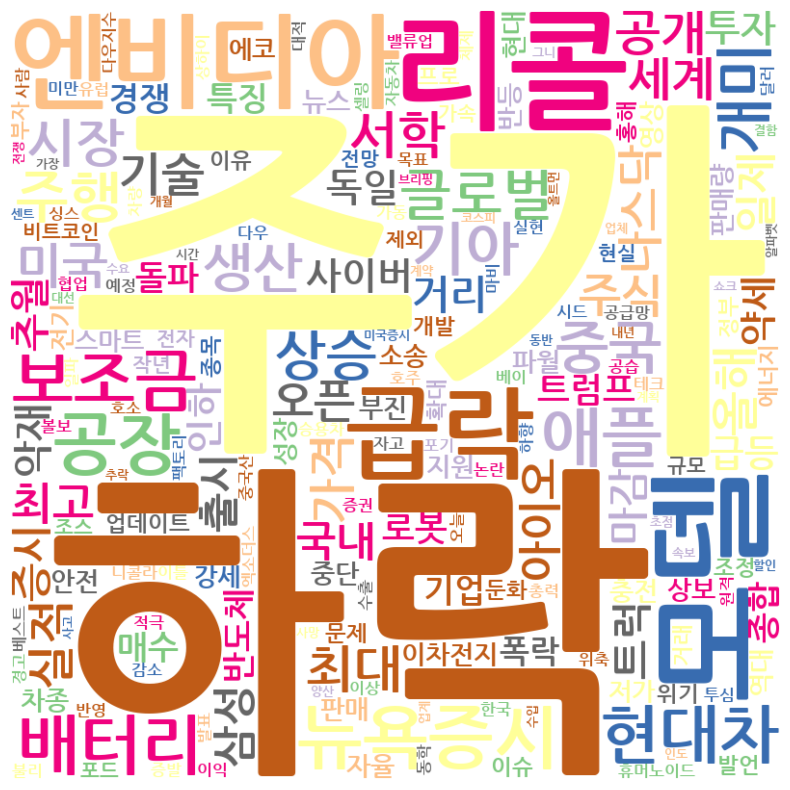

In [35]:
# 워드 클라우드 생성
font_path = 'C:/Windows/Fonts/'
font_name = 'NanumGothicBold.ttf'
word_cloud = WordCloud(font_path=font_path+font_name,
                       background_color='white',
                       colormap='Accent_r',
                       width=800, height=800,
                       ).generate_from_frequencies(word_count)

# 워드 클라우드 이미지로 출력
plt.figure(figsize=(20, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 워드 클라우드 이미지로 저장
word_cloud.to_file(f'../data/{csv_file}_wordcloud.png')

---
가장 눈에 띄는 키워드인 [주가, 하락, 급락] 및 '뉴욕증시'와 같이 주식관련 키워드들을 보아 사람들의 테슬라 주식에 대한 관심이 큰 것으로 보이며, 데이터 수집 기간인 2023.03.19~2024.03.19 동안 주가가 하락 및 급락한 것으로 예측할 수 있다. <br/>

![TSLA price](../img/TSLA.png) <br/>
실제로 1년 동안, 초반엔 상승하다가 최근까지 하락하는 모습을 보이는 것을 확인할 수 있다.
<br/>
<br/>
<br/>
'리콜'이란 키워드의 빈도수도 큰 것으로 보아 근 1년 동안에 리콜이 발생한 것으로 예측되며, 이 사건이 주가의 하락에도 영향을 줄 수 있음을 생각할 수 있다.

![Articles](../img/racallNews.png) <br/>
실제 확인해 본 결과, 2023.09 ~ 2024.01 동안 리콜이 발생한 것으로 확인된다.